In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('travel_syntetic6_realistic_strict.csv')
df.shape

(13000, 13)

In [544]:
df.columns

Index(['Destination', 'Budget', 'Climate', 'Travel_Type', 'Best_Season',
       'Duration_Days', 'Avg_Temperature', 'Avg_Cost', 'Rating', 'Crowd_Level',
       'Accommodation_Type', 'Family_Friendly', 'Travel_Method'],
      dtype='object')

In [545]:
df.head()

,Destination,Budget,Climate,Travel_Type,Best_Season,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Crowd_Level,Accommodation_Type,Family_Friendly,Travel_Method
0,Goa,Low,Warm,Beach,Winter,5,28°C,₹8819,1.98,High,Resort,No,Flight
1,Goa,Low,Warm,Beach,Winter,2,28°C,₹8976,1.87,Low,Resort,No,Flight
2,Goa,Low,Warm,Beach,Winter,1,32°C,₹17115,4.04,Medium,Hotel,Yes,Flight
3,Goa,Low,Warm,Beach,Winter,2,29°C,₹19029,1.37,High,Hotel,No,Flight
4,Goa,Low,Warm,Beach,Winter,9,28°C,₹23054,1.50,High,Resort,No,Train


In [546]:
df.tail()

,Destination,Budget,Climate,Travel_Type,Best_Season,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Crowd_Level,Accommodation_Type,Family_Friendly,Travel_Method
12995,Leh,High,Cold,Adventure,Summer,9,10°C,₹31020,1.39,Medium,Homestay,No,Flight
12996,Leh,High,Cold,Adventure,Summer,10,8°C,₹39398,1.62,High,Lodge,No,Flight
12997,Leh,High,Cold,Adventure,Summer,6,11°C,₹26074,4.60,Medium,Homestay,No,Flight
12998,Leh,High,Cold,Adventure,Summer,7,8°C,₹33481,4.54,Low,Homestay,No,Flight
12999,Leh,High,Cold,Adventure,Summer,10,11°C,₹38957,4.92,High,Lodge,No,Bus


In [547]:
df.dtypes

Destination            object
Budget                 object
Climate                object
Travel_Type            object
Best_Season            object
Duration_Days           int64
Avg_Temperature        object
Avg_Cost               object
Rating                float64
Crowd_Level            object
Accommodation_Type     object
Family_Friendly        object
Travel_Method          object
dtype: object

In [548]:
df.duplicated().sum()

np.int64(0)

In [549]:
popular_dest=df['Destination'].value_counts().head(5).index
popular_dest

Index(['Goa', 'Jaipur', 'Kerala', 'Manali', 'Shimla'], dtype='object', name='Destination')

C:\Users\sujin\AppData\Local\Temp\ipykernel_6876\3914595146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1=sns.countplot(x='Destination', data=top5_df, order=popular_dest, palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Goa'),
  Text(1, 0, 'Jaipur'),
  Text(2, 0, 'Kerala'),
  Text(3, 0, 'Manali'),
  Text(4, 0, 'Shimla')])

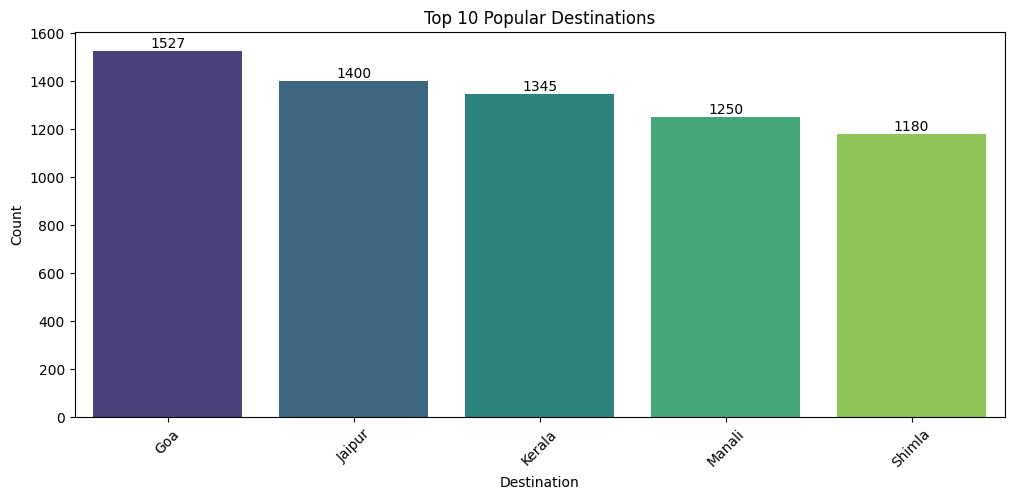

In [550]:
top5_df = df[df['Destination'].isin(popular_dest)]

plt.figure(figsize=(12,5))
fig1=sns.countplot(x='Destination', data=top5_df, order=popular_dest, palette='viridis')

for i in fig1.containers:
    fig1.bar_label(i)
plt.title("Top 10 Popular Destinations")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)

In [551]:
average_rating=df.groupby('Destination') ['Rating'].median().sort_values(ascending=False)
average_rating

Destination
Ooty          3.14
Darjeeling    3.11
Shimla        3.10
Jaipur        3.04
Manali        3.03
Goa           3.01
Udaipur       3.00
Kerala        2.98
Agra          2.97
Leh           2.95
Rishikesh     2.92
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Average Rating by Destination')

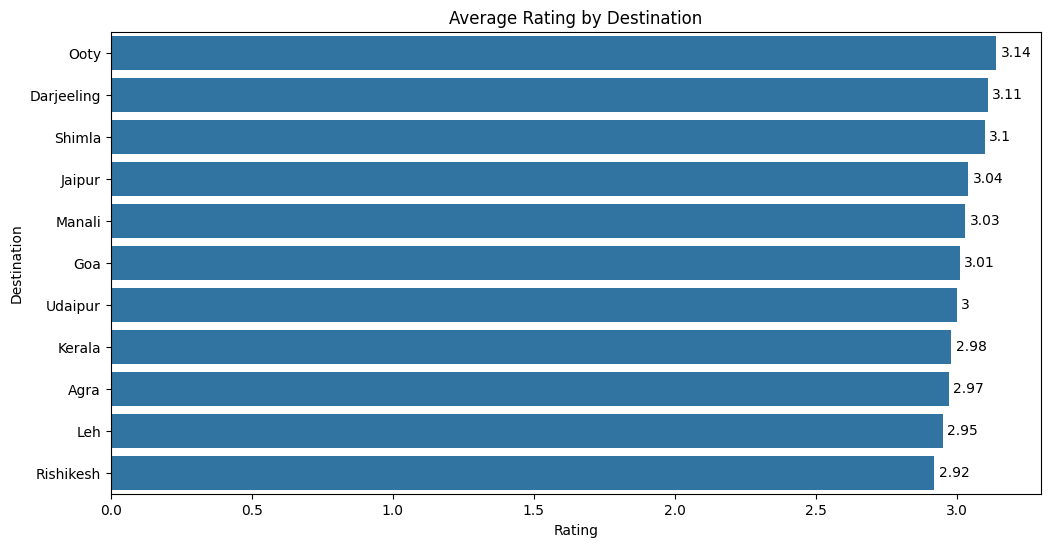

In [552]:
average_rating_df = average_rating.reset_index()

plt.figure(figsize=(12,6))
fig2 = sns.barplot(x='Rating', y='Destination', data=average_rating_df)
fig2.bar_label(fig2.containers[0], padding=3)

plt.title("Average Rating by Destination")


In [553]:
family_friendly=df['Family_Friendly'].value_counts()
family_friendly

Family_Friendly
No     6481
Yes    6459
Name: count, dtype: int64

Text(0.5, 1.0, 'Family Friendly Destinations Count')

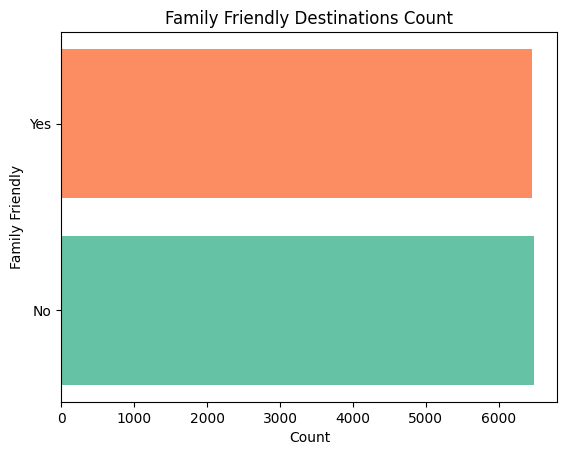

In [554]:
# clr=['b','g']
plt.barh(
    family_friendly.index,
    family_friendly.values,
    color=plt.cm.Set2(range(len(family_friendly)))
)
plt.xlabel('Count')
plt.ylabel('Family Friendly')
plt.title('Family Friendly Destinations Count')

In [555]:
crowd_counts = df.groupby('Destination')['Crowd_Level'].value_counts()
crowd_counts

Destination  Crowd_Level
Agra         High           377
             Medium         371
             Low            352
Darjeeling   Medium         350
             High           339
             Low            331
Goa          Medium         539
             High           505
             Low            483
Jaipur       Low            492
             High           463
             Medium         445
Kerala       Low            460
             Medium         451
             High           434
Leh          High           337
             Medium         337
             Low            324
Manali       High           428
             Low            414
             Medium         408
Ooty         High           355
             Low            333
             Medium         292
Rishikesh    Medium         391
             High           388
             Low            371
Shimla       Medium         401
             High           391
             Low            388
Udaipur      Lo

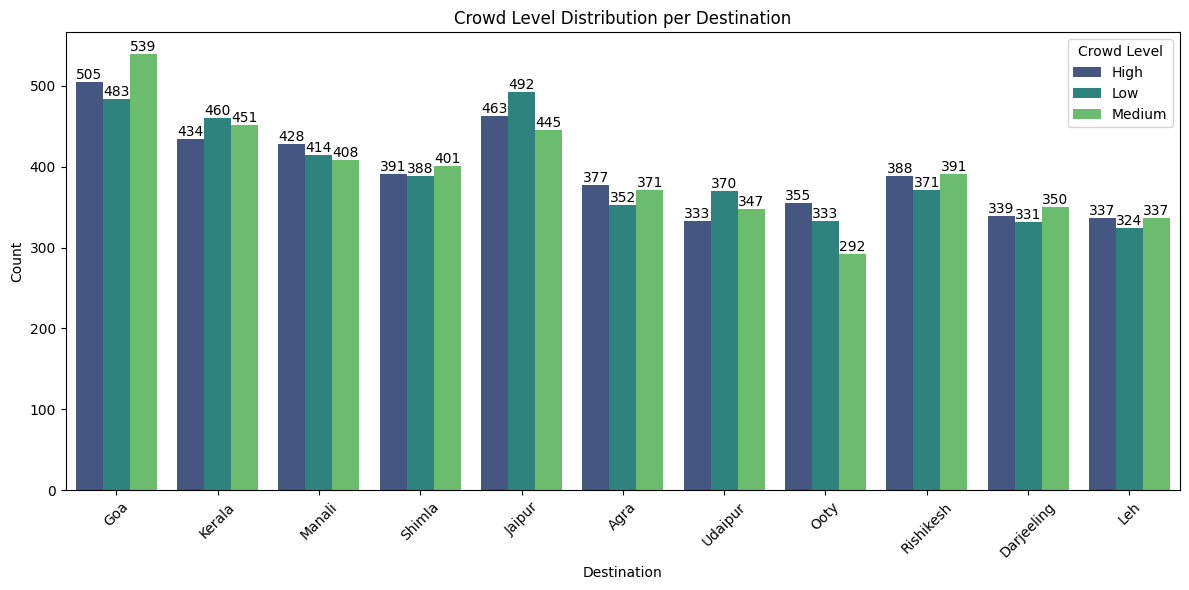

In [556]:
plt.figure(figsize=(12,6))
fig3=sns.countplot(x='Destination', hue='Crowd_Level', data=df, palette='viridis')
for i in fig3.containers:
    fig3.bar_label(i)
plt.title("Crowd Level Distribution per Destination")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Crowd Level')
plt.tight_layout()

In [557]:
travel_type=df['Travel_Method'].value_counts()
travel_type

Travel_Method
Car       4048
Train     3639
Bus       3315
Flight    1956
Name: count, dtype: int64

Text(0.5, 1.0, 'Travel Method')

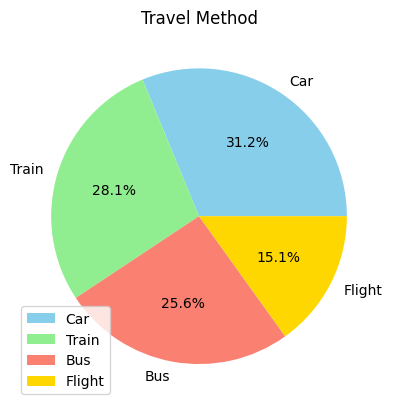

In [558]:
plt.pie(travel_type, labels=travel_type.index, autopct='%1.1f%%', colors=['skyblue','lightgreen','salmon','gold','orange'])
plt.legend(loc='lower left')
plt.title('Travel Method')

In [559]:
df.dtypes

Destination            object
Budget                 object
Climate                object
Travel_Type            object
Best_Season            object
Duration_Days           int64
Avg_Temperature        object
Avg_Cost               object
Rating                float64
Crowd_Level            object
Accommodation_Type     object
Family_Friendly        object
Travel_Method          object
dtype: object

In [560]:
df['Avg_Temperature'] = df['Avg_Temperature'].str.replace('°C','').astype(float)
df['Avg_Cost'] = df['Avg_Cost'].str.replace('₹','').astype(float)
df.head(10)

,Destination,Budget,Climate,Travel_Type,Best_Season,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Crowd_Level,Accommodation_Type,Family_Friendly,Travel_Method
0,Goa,Low,Warm,Beach,Winter,5,28.0,8819.0,1.98,High,Resort,No,Flight
1,Goa,Low,Warm,Beach,Winter,2,28.0,8976.0,1.87,Low,Resort,No,Flight
2,Goa,Low,Warm,Beach,Winter,1,32.0,17115.0,4.04,Medium,Hotel,Yes,Flight
3,Goa,Low,Warm,Beach,Winter,2,29.0,19029.0,1.37,High,Hotel,No,Flight
4,Goa,Low,Warm,Beach,Winter,9,28.0,23054.0,1.50,High,Resort,No,Train
5,Goa,Low,Warm,Beach,Winter,2,NaN,14300.0,1.18,Low,Hotel,Yes,Flight
6,Goa,Low,Warm,Beach,Winter,8,31.0,17108.0,3.54,Medium,Resort,Yes,Train
7,Goa,Low,Warm,Beach,Winter,3,30.0,10339.0,3.14,Medium,Resort,No,Flight
8,Goa,Low,Warm,Beach,Winter,6,32.0,15196.0,4.37,Medium,Resort,No,Flight
9,Goa,Low,Warm,Beach,Winter,4,30.0,10168.0,4.65,Medium,Resort,No,Train


In [561]:
df.dtypes

Destination            object
Budget                 object
Climate                object
Travel_Type            object
Best_Season            object
Duration_Days           int64
Avg_Temperature       float64
Avg_Cost              float64
Rating                float64
Crowd_Level            object
Accommodation_Type     object
Family_Friendly        object
Travel_Method          object
dtype: object

In [562]:
average_cost=df.groupby('Accommodation_Type') ['Avg_Cost'].mean().sort_values(ascending=False)
average_cost

Accommodation_Type
Resort      33754.807023
Hotel       33117.215668
Homestay    29962.620911
Lodge       28701.242190
Name: Avg_Cost, dtype: float64

C:\Users\sujin\AppData\Local\Temp\ipykernel_6876\1105764780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_cost.index, y=average_cost.values, palette='coolwarm')


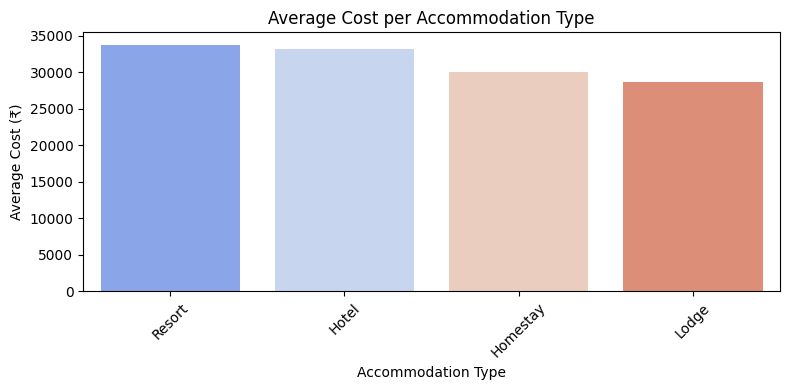

In [563]:
plt.figure(figsize=(8,4))
sns.barplot(x=average_cost.index, y=average_cost.values, palette='coolwarm')
plt.title("Average Cost per Accommodation Type")
plt.xlabel("Accommodation Type")
plt.ylabel("Average Cost (₹)")
plt.xticks(rotation=45)
plt.tight_layout()

In [564]:
df.isna().sum()

Destination             0
Budget                 98
Climate                 0
Travel_Type             0
Best_Season             0
Duration_Days           0
Avg_Temperature        73
Avg_Cost              125
Rating                  0
Crowd_Level             0
Accommodation_Type      0
Family_Friendly        60
Travel_Method          42
dtype: int64

In [565]:
df['Budget'].unique()

array(['Low', nan, 'Medium', 'High'], dtype=object)

In [566]:
df['Avg_Temperature'].unique()

array([ 28.,  32.,  29.,  nan,  31.,  30., -14.,  -1.,  10.,  -7.,  17.,
        35.,  37.,  36.,  13.,  48.,  22.,   5.,  16.,  19.,  11.,  18.,
        15.,  12.,  20.,  14.,  53.,  57.,   6.,   8.,   9.,  25.,  40.,
        23.,  24.,  21.,   3., -11.,  52.,  33.,  26.,  27.,  55., -13.,
        46., -12.,  50.,  58.,  59.,  -2.,  47.,  -9.,  38., -10.,  41.,
        44.,  -3.,  -5.,  39.,  -8.,  34.,   7.,   0.])

In [567]:
df['Avg_Cost'].unique()

array([ 8819.,  8976., 17115., ..., 39398., 33481., 38957.],
      shape=(10539,))

In [568]:
df['Family_Friendly'].unique()

array(['No', 'Yes', nan], dtype=object)

In [569]:
df['Travel_Method'].unique()

array(['Flight', 'Train', nan, 'Bus', 'Car'], dtype=object)

In [570]:
df['Budget']=df['Budget'].fillna(df['Budget'].mode()[0])
df['Avg_Temperature']=df['Avg_Temperature'].fillna(df['Avg_Temperature'].median())
df['Avg_Cost']=df['Avg_Cost'].fillna(df['Avg_Cost'].median())
df['Family_Friendly']=df['Family_Friendly'].fillna(df['Family_Friendly'].mode()[0])
df['Travel_Method']=df['Travel_Method'].fillna(df['Travel_Method'].mode()[0])
df.isna().sum()

Destination           0
Budget                0
Climate               0
Travel_Type           0
Best_Season           0
Duration_Days         0
Avg_Temperature       0
Avg_Cost              0
Rating                0
Crowd_Level           0
Accommodation_Type    0
Family_Friendly       0
Travel_Method         0
dtype: int64

<Axes: ylabel='Avg_Cost'>

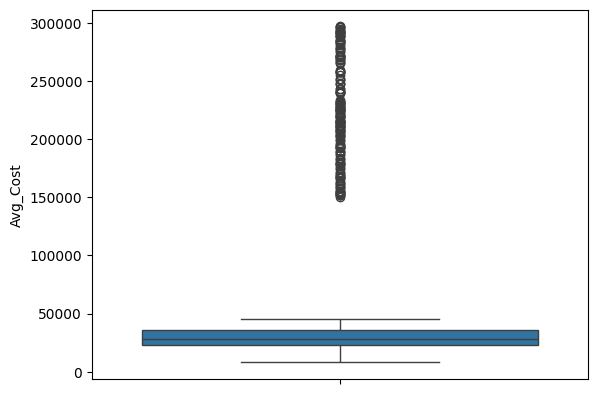

In [571]:
# numeric_cols = ['Duration_Days','Avg_Temperature','Avg_Cost','Rating']
# sns.boxplot(data=df[numeric_cols])
sns.boxplot(y='Avg_Cost',data=df)


In [572]:
Q1=np.percentile(df['Avg_Cost'],25,method='midpoint')
Q3=np.percentile(df['Avg_Cost'],75,method='midpoint')
IQR=Q3-Q1
print(IQR)

12808.5


In [573]:
upper=Q3+1.5*IQR
upper_array=np.array(df['Avg_Cost']>=upper)
print('Upper Limit:',upper)
print(upper_array)
print(upper_array.sum())

Upper Limit: 54735.25
[False False False ... False False False]
178


In [574]:
median_cost = df['Avg_Cost'].median()

for i in df.index:
    if df.loc[i, 'Avg_Cost'] > upper:
        df.loc[i, 'Avg_Cost'] = median_cost

<Axes: ylabel='Avg_Cost'>

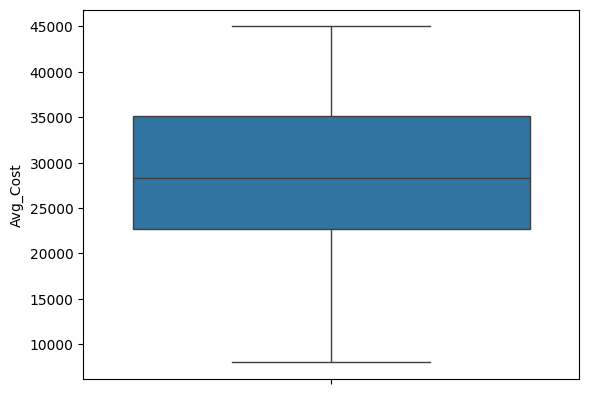

In [575]:
sns.boxplot(y='Avg_Cost',data=df)


In [581]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

df_chi = df.copy()

categorical_features = [
    'Budget',
    'Climate',
    'Travel_Type',
    'Best_Season',
    'Crowd_Level',
    'Accommodation_Type',
    'Family_Friendly',
    'Travel_Method'
]

target = 'Destination'

# Label Encoding
encoded = LabelEncoder()
for col in categorical_features:
    df_chi[col] = encoded.fit_transform(df_chi[col])

df_chi[target] = encoded.fit_transform(df_chi[target])

encoded_X = df_chi[categorical_features]
encoded_y = df_chi[target]


In [582]:
chi_scores, p_values = chi2(encoded_X, encoded_y)

chi_df = pd.DataFrame({
    'Feature': categorical_features,
    'Chi_Square_Score': chi_scores,
    'p_value': p_values
}).sort_values(by='p_value')

chi_df


,Feature,Chi_Square_Score,p_value
0,Budget,9272.363276,0.000000
1,Climate,10425.492841,0.000000
2,Travel_Type,12283.916566,0.000000
3,Best_Season,6578.000000,0.000000
5,Accommodation_Type,2255.776702,0.000000
7,Travel_Method,5790.215893,0.000000
4,Crowd_Level,5.987299,0.816329
6,Family_Friendly,2.173288,0.994831


In [583]:
df.drop(['Crowd_Level','Family_Friendly'], axis=1, inplace=True)
df.shape

(13000, 11)

In [584]:
New_encoded =pd.get_dummies(df[['Budget','Climate', 'Travel_Type', 'Best_Season', 'Accommodation_Type','Travel_Method']],drop_first=True,dtype=int)
New_encoded.shape

(13000, 13)

In [585]:
final_df = pd.concat([df, New_encoded], axis=1)
final_df

,Destination,Budget,Climate,Travel_Type,Best_Season,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Accommodation_Type,...,Climate_Warm,Travel_Type_Beach,Travel_Type_Historical,Best_Season_Winter,Accommodation_Type_Hotel,Accommodation_Type_Lodge,Accommodation_Type_Resort,Travel_Method_Car,Travel_Method_Flight,Travel_Method_Train
0,Goa,Low,Warm,Beach,Winter,5,28.0,8819.0,1.98,Resort,...,1,1,0,1,0,0,1,0,1,0
1,Goa,Low,Warm,Beach,Winter,2,28.0,8976.0,1.87,Resort,...,1,1,0,1,0,0,1,0,1,0
2,Goa,Low,Warm,Beach,Winter,1,32.0,17115.0,4.04,Hotel,...,1,1,0,1,1,0,0,0,1,0
3,Goa,Low,Warm,Beach,Winter,2,29.0,19029.0,1.37,Hotel,...,1,1,0,1,1,0,0,0,1,0
4,Goa,Low,Warm,Beach,Winter,9,28.0,23054.0,1.50,Resort,...,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,Leh,High,Cold,Adventure,Summer,9,10.0,31020.0,1.39,Homestay,...,0,0,0,0,0,0,0,0,1,0
12996,Leh,High,Cold,Adventure,Summer,10,8.0,39398.0,1.62,Lodge,...,0,0,0,0,0,1,0,0,1,0
12997,Leh,High,Cold,Adventure,Summer,6,11.0,26074.0,4.60,Homestay,...,0,0,0,0,0,0,0,0,1,0
12998,Leh,High,Cold,Adventure,Summer,7,8.0,33481.0,4.54,Homestay,...,0,0,0,0,0,0,0,0,1,0


In [586]:
final_df[['Avg_Cost']].sort_values(by='Avg_Cost', ascending=False).head(5)


,Avg_Cost
6611,44995.0
8191,44992.0
6597,44979.0
8423,44977.0
8268,44976.0


In [587]:
final_df.drop(['Budget','Climate', 'Travel_Type', 'Best_Season', 'Accommodation_Type','Travel_Method'],axis=1,inplace=True)
final_df

,Destination,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Budget_Low,Budget_Medium,Climate_Hot,Climate_Warm,Travel_Type_Beach,Travel_Type_Historical,Best_Season_Winter,Accommodation_Type_Hotel,Accommodation_Type_Lodge,Accommodation_Type_Resort,Travel_Method_Car,Travel_Method_Flight,Travel_Method_Train
0,Goa,5,28.0,8819.0,1.98,1,0,0,1,1,0,1,0,0,1,0,1,0
1,Goa,2,28.0,8976.0,1.87,1,0,0,1,1,0,1,0,0,1,0,1,0
2,Goa,1,32.0,17115.0,4.04,1,0,0,1,1,0,1,1,0,0,0,1,0
3,Goa,2,29.0,19029.0,1.37,1,0,0,1,1,0,1,1,0,0,0,1,0
4,Goa,9,28.0,23054.0,1.50,1,0,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,Leh,9,10.0,31020.0,1.39,0,0,0,0,0,0,0,0,0,0,0,1,0
12996,Leh,10,8.0,39398.0,1.62,0,0,0,0,0,0,0,0,1,0,0,1,0
12997,Leh,6,11.0,26074.0,4.60,0,0,0,0,0,0,0,0,0,0,0,1,0
12998,Leh,7,8.0,33481.0,4.54,0,0,0,0,0,0,0,0,0,0,0,1,0


In [588]:
x = final_df.drop('Destination', axis=1)
y = final_df['Destination']
x

,Duration_Days,Avg_Temperature,Avg_Cost,Rating,Budget_Low,Budget_Medium,Climate_Hot,Climate_Warm,Travel_Type_Beach,Travel_Type_Historical,Best_Season_Winter,Accommodation_Type_Hotel,Accommodation_Type_Lodge,Accommodation_Type_Resort,Travel_Method_Car,Travel_Method_Flight,Travel_Method_Train
0,5,28.0,8819.0,1.98,1,0,0,1,1,0,1,0,0,1,0,1,0
1,2,28.0,8976.0,1.87,1,0,0,1,1,0,1,0,0,1,0,1,0
2,1,32.0,17115.0,4.04,1,0,0,1,1,0,1,1,0,0,0,1,0
3,2,29.0,19029.0,1.37,1,0,0,1,1,0,1,1,0,0,0,1,0
4,9,28.0,23054.0,1.50,1,0,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,9,10.0,31020.0,1.39,0,0,0,0,0,0,0,0,0,0,0,1,0
12996,10,8.0,39398.0,1.62,0,0,0,0,0,0,0,0,1,0,0,1,0
12997,6,11.0,26074.0,4.60,0,0,0,0,0,0,0,0,0,0,0,1,0
12998,7,8.0,33481.0,4.54,0,0,0,0,0,0,0,0,0,0,0,1,0


In [589]:
y

0        Goa
1        Goa
2        Goa
3        Goa
4        Goa
        ... 
12995    Leh
12996    Leh
12997    Leh
12998    Leh
12999    Leh
Name: Destination, Length: 13000, dtype: object

In [590]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y,test_size=0.30,random_state=42)
x_train.values

array([[7.0000e+00, 2.0000e+01, 2.4404e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3000e+01, 3.0835e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.2000e+01, 1.6770e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [8.0000e+00, 2.4000e+01, 3.9259e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 3.2000e+01, 1.7478e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 2.3000e+01, 3.1648e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(9100, 17))

In [591]:
y_train

10345     Rishikesh
4983         Shimla
10368     Rishikesh
3219         Manali
3284         Manali
            ...    
11964    Darjeeling
5191         Shimla
5390         Jaipur
860             Goa
7270           Agra
Name: Destination, Length: 9100, dtype: object

In [592]:
x_test.values

array([[6.0000e+00, 1.7000e+01, 2.8885e+04, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+01, 2.9000e+01, 2.5544e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [8.0000e+00, 2.5000e+01, 4.4009e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.3000e+01, 8.0000e+00, 3.0334e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 2.5000e+01, 3.7830e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0000e+00, 1.0000e+01, 3.7015e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(3900, 17))

In [593]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Ooty', 'Kerala', 'Jaipur', ..., 'Leh', 'Udaipur', 'Leh'],
      shape=(3900,), dtype=object)

In [594]:
y_test.values

array(['Manali', 'Kerala', 'Jaipur', ..., 'Leh', 'Jaipur', 'Leh'],
      shape=(3900,), dtype=object)

In [595]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test, y_pred)*100
report=classification_report(y_test,y_pred)
score

84.2051282051282

In [596]:
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# clf = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# clf.fit(x_train, y_train)

# print("Best Parameters:", clf.best_params_)
# print("Best CV Accuracy:", clf.best_score_)


In [597]:
model1=RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=150,random_state=42,class_weight="balanced")
model1.fit(x_train,y_train)
# y_pred2=model1.predict(x_test)
# score2=accuracy_score(y_test,y_pred1)
# score2

destinations = model1.classes_

y_pred1 = model1.predict_proba(x_test)

top3_idx = np.argsort(y_pred1, axis=1)[:, -3:][:, ::-1]

top3_destinations = destinations[top3_idx]
# top3_probabilities = np.take_along_axis(y_pred1, top3_idx, axis=1)
y_pred_top1 = destinations[top3_idx[:, 0]]

accuracy_score(y_test, y_pred_top1)


0.8487179487179487

In [598]:
y_pred_top1

array(['Ooty', 'Kerala', 'Udaipur', ..., 'Leh', 'Jaipur', 'Leh'],
      shape=(3900,), dtype=object)

In [599]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_pred_top1)
report=classification_report(y_test,y_pred_top1)
cm

array([[327,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 193,   0,   0,   0,   0,  18,  66,   0,   0,   0],
       [  0,   0, 458,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 232,   0,   0,   0,   0,   0,   0, 201],
       [  0,   0,   0,   0, 401,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0, 274,   2,   0,   0,   5,   0],
       [  0,  15,   0,   0,   0,   0, 171, 223,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   3, 298,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 343,   0,   0],
       [  0,   0,   0,   0,   0,   2,   1,   2,   0, 333,   0],
       [  1,   0,   0,  47,   0,   0,   0,   0,   0,   0, 280]])

In [600]:
print(report)

              precision    recall  f1-score   support

        Agra       1.00      1.00      1.00       327
  Darjeeling       0.91      0.70      0.79       277
         Goa       1.00      1.00      1.00       459
      Jaipur       0.83      0.54      0.65       433
      Kerala       1.00      1.00      1.00       401
         Leh       0.99      0.97      0.98       282
      Manali       0.88      0.42      0.57       409
        Ooty       0.51      0.98      0.67       303
   Rishikesh       1.00      1.00      1.00       343
      Shimla       0.99      0.99      0.99       338
     Udaipur       0.58      0.85      0.69       328

    accuracy                           0.85      3900
   macro avg       0.88      0.86      0.85      3900
weighted avg       0.89      0.85      0.85      3900



In [601]:
import os
import joblib
os.makedirs("models", exist_ok=True)

# Save model in 'models' folder
joblib.dump(model, "models/travel_model2.pkl")
joblib.dump(x.columns, "models/model_columns2.pkl")

['models/model_columns2.pkl']